# Capstone Project Domain #11 ( Sentiment Analysis in Twitter )

Tweet text along with other features has been extracted from different from different sources (domain) using APIs.
Each row of the dataset contains sentiment code (negative, positive and neutral embedded in Twit-id column. The task is to predict whether a tweet contains positive, negative, or neutral sentiment. This is a supervised learning task where given a text string.

## Step 1 - Pre Processing

#### In this file all the Pre-Processing Steps will be performed.
### Flow :- 

1. Read the data from the Input File
2. Finding the missing values in Each Column
3. Creating the Label Columns from Tweet ID
4. Dropping rows with NULL tweets
5. Drop duplicate rows and tweet ID
6. Filling NULL tweet source and tweet by columns
7. Dropping Date Column
8. Cleaning Tweet_Source column to follow same format
9. Visualizing the data as PIE Charts
10. Visualizing the data as Word Cloud to see patterns.
11. Saving the Step 1 - Pre-Processing data to the file.

### Input File - Base_tweets_DataSetV3.xlsx
### Output File - Step1_PreProcessing_Group33_Cleaned_Tweets.csv

In [1]:
# Library Imports

import numpy as np 
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline

numpy: 1.18.5
pandas: 1.0.5
re: 2.2.1
nltk: 3.5


In [2]:
# Getting the Stop Words and Other Text Processing Libraries
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aravindv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravindv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Input / Output - Folders where the input data will be read and output will be stored.

In [3]:
InputdataFolder = "/Users/aravindv/Wind/BITS Pilani/PGP - AIML/Course/Course 7 - Capstone Project"
OutputFolder = "/Users/aravindv/Wind/BITS Pilani/PGP - AIML/Course/Course 7 - Capstone Project/Output"
MLOutfolder =  "/Users/aravindv/Wind/BITS Pilani/PGP - AIML/Course/Course 7 - Capstone Project/ML"

In [4]:
# Reading the data file and storing in the dataframe tweets_original_df
tweets_original_df = pd.read_excel(InputdataFolder+"/Base_tweets_DataSetV3.xlsx")
print(tweets_original_df.shape)

(30256, 10)


In [5]:
# Peek at the data
print(tweets_original_df.head(5))
print("--------------------------------")
print(tweets_original_df.dtypes)

             tweet_id SourceDataBase       OS  Tweet-Class_category-Code  \
0  neu-GG-Tweet-11945          MySQL  Windows                         99   
1  neu-GG-Tweet-11944          MySQL  Windows                         99   
2  neu-GG-Tweet-11943          MySQL  Windows                         99   
3  neu-GG-Tweet-11942          MySQL  Windows                         99   
4  neu-GG-Tweet-11941          MySQL  Windows                         99   

  Tweet_source Tweeted-By  retweet_count  \
0          NaN     P32013              0   
1          NaN     P32012              0   
2          NaN     P32011              0   
3          NaN     P32010              0   
4          NaN     P32009              0   

                                               Tweet        Date Created  \
0                         Just landed. My ears hurt  2016-02-27 11:35:52   
1  ouch following the #ASOT400 in TweetDeck excee... 2016-02-27 11:35:52   
2  @Nessiebear i really wanna see it! but no one .

## Pre - Processing Steps

### 1 . Finding the missing values in each column

In [6]:
# Function to find the missing values in each column

def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [7]:
# Invoking the find_missing_values_func() with data frame of original tweets

columnsWiseMissingValue = find_missing_values_func(tweets_original_df) 
print(columnsWiseMissingValue)

Selected dataframe has 10 columns.
There are 5 columns that have missing values.
              Missing Values  % of Total Values
Date Created           10378               34.3
Tweet_source            2230                7.4
Tweet                    101                0.3
Country                   76                0.3
Tweeted-By                33                0.1


### 2. Creating the Label Column from the Tweet ID

In [8]:
# The dataset contains a column called tweet_id which is used to get the Label 
# Extract label_id from tweet_id - First 3 character label_id

label = list(tweets_original_df['tweet_id'].str[:3])
tweets_original_df['label_id'] = pd.Series(label).values

In [9]:
# List of Tweets with Label Column Added
display(tweets_original_df.head(5))

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Date Created,Country,label_id
0,neu-GG-Tweet-11945,MySQL,Windows,99,NaN,P32013,0,Just landed. My ears hurt,2016-02-27 11:35:52,Canada,neu
1,neu-GG-Tweet-11944,MySQL,Windows,99,NaN,P32012,0,ouch following the #ASOT400 in TweetDeck excee...,2016-02-27 11:35:52,Canada,neu
2,neu-GG-Tweet-11943,MySQL,Windows,99,NaN,P32011,0,@Nessiebear i really wanna see it! but no one ...,2016-02-27 11:35:52,Canada,neu
3,neu-GG-Tweet-11942,MySQL,Windows,99,NaN,P32010,0,"@TessAaaaah Ahh, this is how you reply!! I had...",2016-02-27 11:35:52,Canada,neu
4,neu-GG-Tweet-11941,MySQL,Windows,99,NaN,P32009,0,@chenez awwww. and i didn't get to be the hero...,2016-02-27 11:35:52,Canada,neu


### 3. Drop rows which contain NULL tweets as Text Processing will be done on the tweet column

In [10]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing 
tweets_original_df = tweets_original_df.dropna(subset=["Tweet"])

### 4. Drop Duplicate rows and tweet_id  - To be done

### 5. Filling Null Tweet Source and Tweet By columns

In [11]:
# Inpute Null Tweet_source as OTHER
column = 'Tweet_source'
tweets_original_df[column] = tweets_original_df[column].fillna("OTHER")

# Inpute Null Tweeted-By as Unknown
column = 'Tweeted-By'
tweets_original_df[column] = tweets_original_df[column].fillna("Unknown")

In [12]:
#Check missing_values again , if any
columnsWiseMissingValue = find_missing_values_func(tweets_original_df) 
print(columnsWiseMissingValue)

Selected dataframe has 11 columns.
There are 1 columns that have missing values.
              Missing Values  % of Total Values
Date Created           10300               34.2


### 6. Dropping the Date Column as it is not required for modelling

In [13]:
#Dropping Date Created column from main dataframe as it has no use
tweets_original_df = tweets_original_df.drop(["Date Created"], axis=1)

In [14]:
print(tweets_original_df.shape)

(30155, 10)


In [15]:
tweets_original_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'label_id'],
      dtype='object')

In [16]:
# Configuring the Plot Sizes
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


In [17]:
 tweets_original_df["Tweet_source"].value_counts() 

S5       6668
S3       6300
S4       4570
S1       3703
S2       2930
OTHER    2149
S-5      2111
S6       1724
Name: Tweet_source, dtype: int64

### 7. Cleaning  Tweet_source column to follow a single format

In [18]:
# Replace(['S-5','s5'] with 'S5')
tweets_original_df['Tweet_source'] = tweets_original_df['Tweet_source'].replace(['S-5'],'S5')

In [19]:
tweets_original_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'label_id'],
      dtype='object')

# Visualizing the Data

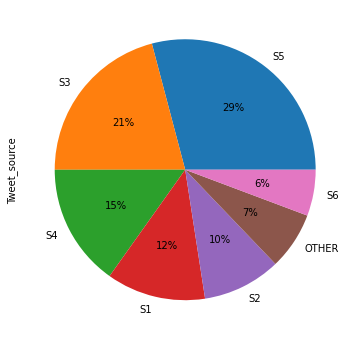

In [20]:
# Plot Distribution
tweets_original_df.Tweet_source.value_counts().plot(kind='pie', autopct='%1.0f%%')

## Label distribution - Positive, Negative, & Neutral

In [21]:
# Check label_id 
tweets_original_df["label_id"].value_counts()

neg    12259
pos     9983
neu     7913
Name: label_id, dtype: int64

Text(0.5, 1.0, 'Count of tweets for each sentiment')

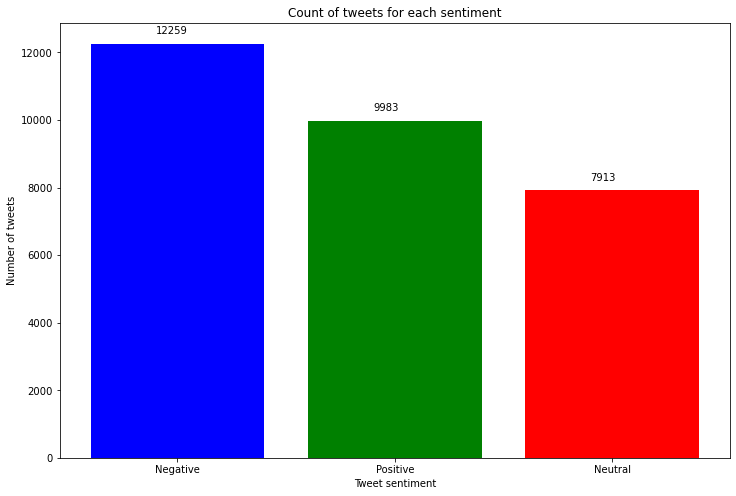

In [22]:
# Refine the graph

class_count = tweets_original_df['label_id'].value_counts() # Returned in descending order [4, 0]

plt.figure(figsize = (12, 8))
plt.bar(['Negative' , 'Positive' , 'Neutral'], height = class_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(class_count.values):
    plt.text(i - 0.1, v+300 , str(v))
    
plt.xlabel('Tweet sentiment')
plt.ylabel('Number of tweets')
plt.title('Count of tweets for each sentiment')

### Convert label_id to numeric  as - {'neu' : 2, 'pos' : 0, 'neg' : 1} 

In [23]:
tweets_original_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'label_id'],
      dtype='object')

In [24]:
# Create the dictionary 
class_dictionary = {'neu' : 2, 'pos' : 0, 'neg' : 1} 
  
# Add a new column named 'Price' 
tweets_original_df['class'] = tweets_original_df['label_id'].map(class_dictionary) 

In [25]:
#Dropping label-id  column from main dataframe as it has been converted to class column as numeric
tweets_original_df = tweets_original_df.drop(["label_id"], axis=1)

In [26]:
# Check label (class in numeric) distribution - # 2 = Neutral, 0 = Positive  , 1 = Negative
tweets_original_df["class"].value_counts()  

1    12259
0     9983
2     7913
Name: class, dtype: int64

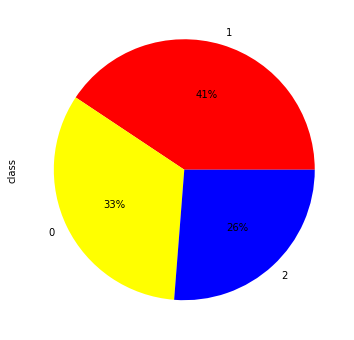

In [27]:
tweets_original_df["class"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

In [28]:
print(tweets_original_df.head(5))

             tweet_id SourceDataBase       OS  Tweet-Class_category-Code  \
0  neu-GG-Tweet-11945          MySQL  Windows                         99   
1  neu-GG-Tweet-11944          MySQL  Windows                         99   
2  neu-GG-Tweet-11943          MySQL  Windows                         99   
3  neu-GG-Tweet-11942          MySQL  Windows                         99   
4  neu-GG-Tweet-11941          MySQL  Windows                         99   

  Tweet_source Tweeted-By  retweet_count  \
0        OTHER     P32013              0   
1        OTHER     P32012              0   
2        OTHER     P32011              0   
3        OTHER     P32010              0   
4        OTHER     P32009              0   

                                               Tweet Country  class  
0                         Just landed. My ears hurt   Canada      2  
1  ouch following the #ASOT400 in TweetDeck excee...  Canada      2  
2  @Nessiebear i really wanna see it! but no one ...  Canada      2 

#### Explore Negative tweet and its catergory ( column - Tweet-Class_category-Code)

##### Explore distribution "no of twwets" (column - retweet_count) for each label

#### Country wise positive , Negative and Neutral - Map If possible

# Tweet pattern

### WordCloud of each class

In [29]:
positive_tweets = ' '.join(tweets_original_df[tweets_original_df['class'] == 0]['Tweet'].str.lower())

In [30]:
neutral_tweets = ' ' .join(tweets_original_df[tweets_original_df['class'] == 2]['Tweet'].str.lower())

In [31]:
negative_tweets = ' '.join(tweets_original_df[tweets_original_df['class'] == 1]['Tweet'].str.lower())

In [32]:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

## POSITIVE Tweets Word Cloud

Text(0.5, 1.0, 'Positive tweets Wordcloud')

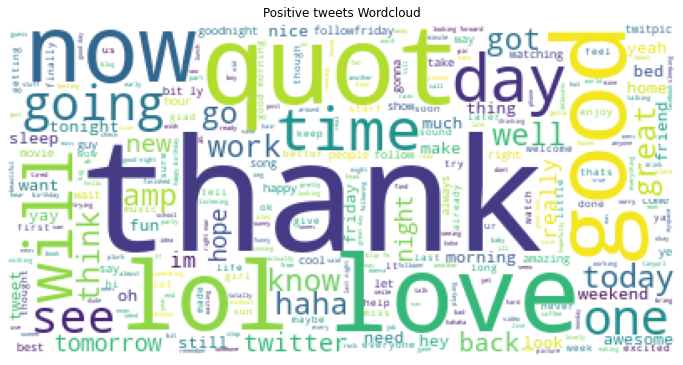

In [33]:
# "stop words", in simple terms it refers to the most common words in a language. 
# These are typically uninformative words, such as "the" or "and", for example, 
# that are thus removed during preprocessing in many Natural Language Processing (NLP) applications.
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

## NEGATIVE Tweets Word Cloud

Text(0.5, 1.0, 'Negative tweets Wordcloud')

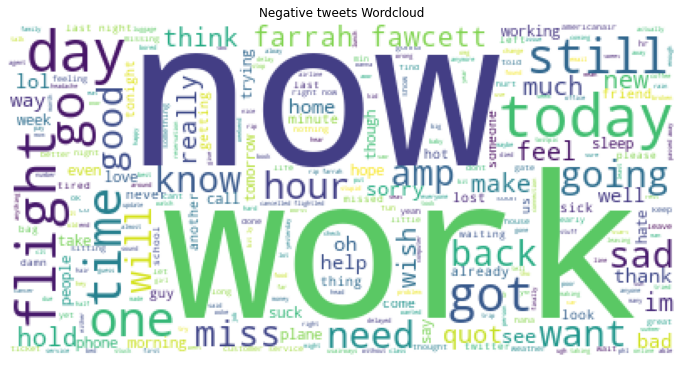

In [34]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

## NEUTRAL Tweets Word Cloud

Text(0.5, 1.0, 'Neutral tweets Wordcloud')

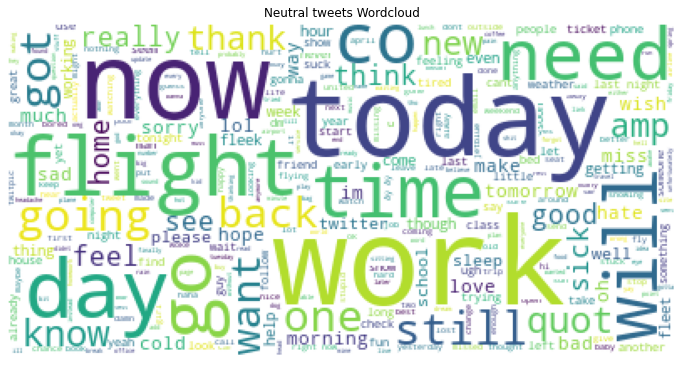

In [35]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(neutral_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Neutral tweets Wordcloud")

In [36]:
#Check null before splitting
columnsWiseMissingValue = find_missing_values_func(tweets_original_df) 
print(columnsWiseMissingValue)

Selected dataframe has 10 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [37]:
print(colored("Class distribution:", "yellow"))
print(tweets_original_df['class'].value_counts())

Class distribution:
1    12259
0     9983
2     7913
Name: class, dtype: int64


# Saving Step 1 Pre-Processing Data

In [38]:
#Save first round cleaned tweets_original_df
tweets_original_df.to_csv(OutputFolder+"/Step1_PreProcessing_Group33_Cleaned_Tweets.csv", index = False)
print(colored("DATA SAVED", "green"))

DATA SAVED


# ----DONE----